#### Exploratory Data Analysis & Key Insights
**Dataset:** KaggleV2-May-2016.zip  
**Author:** Luis Sergio Pastrana Lemus  
**Date:** 2025-05-24

## Libraries

In [1]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
import pprint
import sys

# Define project root dynamically, gets the current directory from whick the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

## Path to Data File

In [2]:
# Build route to data file and upload

data_file_path = project_root / "data" / "processed" / "patients_clean.csv"

df_patients = load_dataset_from_csv(data_file_path, header='infer',  parse_dates=['scheduled_day', 'appointment_day'])


## Exploratory Data Analysis

In [3]:
format_notebook()

In [4]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  bool               
 8   hipertension     110527 non-null  bool               
 9   diabetes         110527 non-null  bool               
 10  alcoholism       110527 non-null  bool               
 11  handcap          110527 non-null  bool               
 12  sms_received     110527 non-null  bool               
 13 

In [5]:
print(df_patients.sample(25, random_state=333))

             patient_id  appointment_id  gender             scheduled_day           appointment_day  age      neighbourhood  scholarship  \
46995    62566927247961         5607061  female 2016-04-20 11:02:15+00:00 2016-05-18 00:00:00+00:00    1             jabour        False   
82570     3996739777887         5645533    male 2016-05-02 10:03:24+00:00 2016-05-02 00:00:00+00:00   11          conquista        False   
71800    74981215322154         5664902  female 2016-05-05 13:39:17+00:00 2016-05-05 00:00:00+00:00   66        santa_lúcia        False   
78525   746757565862383         5700616  female 2016-05-16 09:37:32+00:00 2016-05-17 00:00:00+00:00   78        santo_andre        False   
63501    49375648372849         5704393  female 2016-05-16 15:37:53+00:00 2016-05-19 00:00:00+00:00   46           da_penha        False   
38007    85922122763292         5634129    male 2016-04-28 10:25:11+00:00 2016-05-25 00:00:00+00:00   39     forte_são_joão         True   
104172   58171584692

## Visualizing missing values

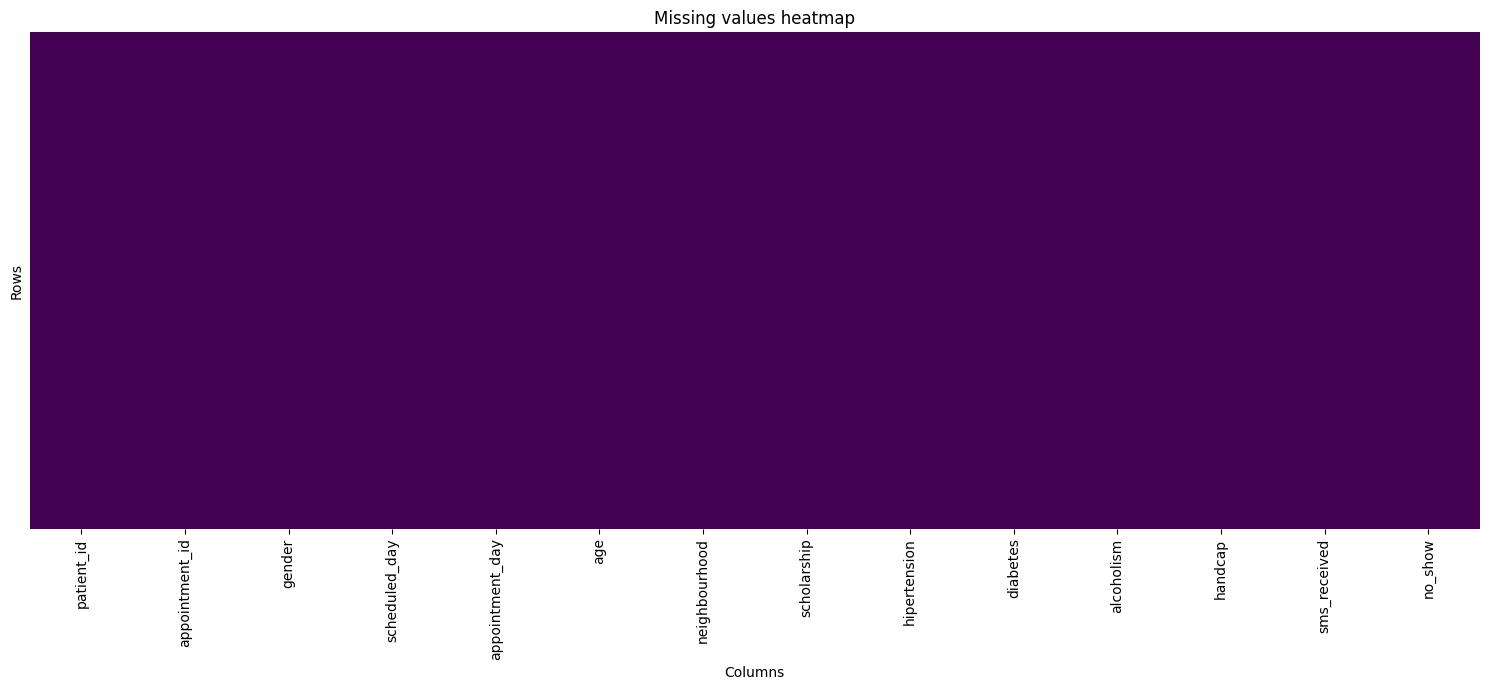

In [6]:
missing_values_heatmap(df_patients)

## Statistical information on quantitative and categorical values

In [7]:
print(df_patients['age'].describe())

count    110527.000000
mean         38.273933
std          22.104720
min           1.000000
25%          20.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


In [8]:
print(df_patients.describe(include='object'))

        gender   neighbourhood no_show
count   110527          110527  110527
unique       2              81       2
top     female  jardim_camburi      no
freq     71840            7717   88208


## Data dispersion statistics for age with boxplot graph

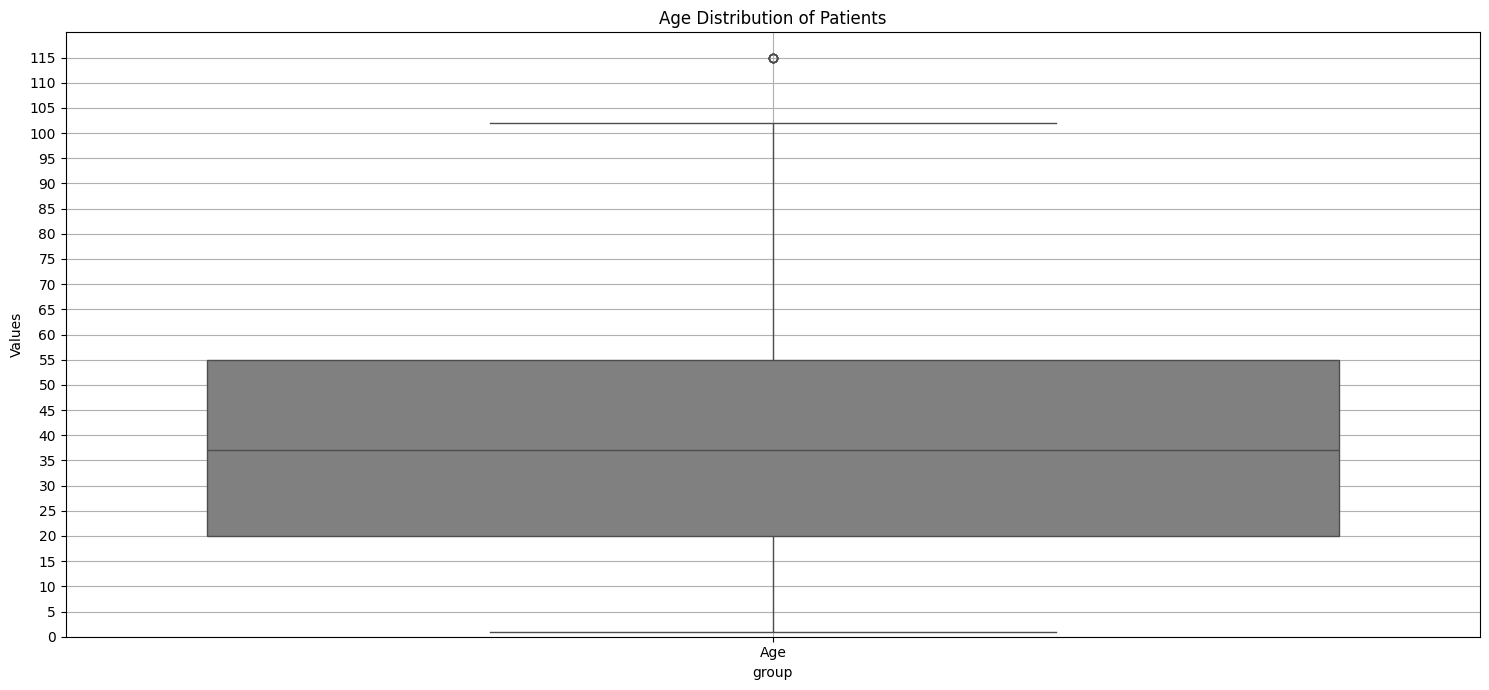

In [9]:
plot_boxplots([df_patients['age']], ['Age'], 'Values', 'Age Distribution of Patients', yticks_range=(0, 120, 5), rotation=0, color='grey')

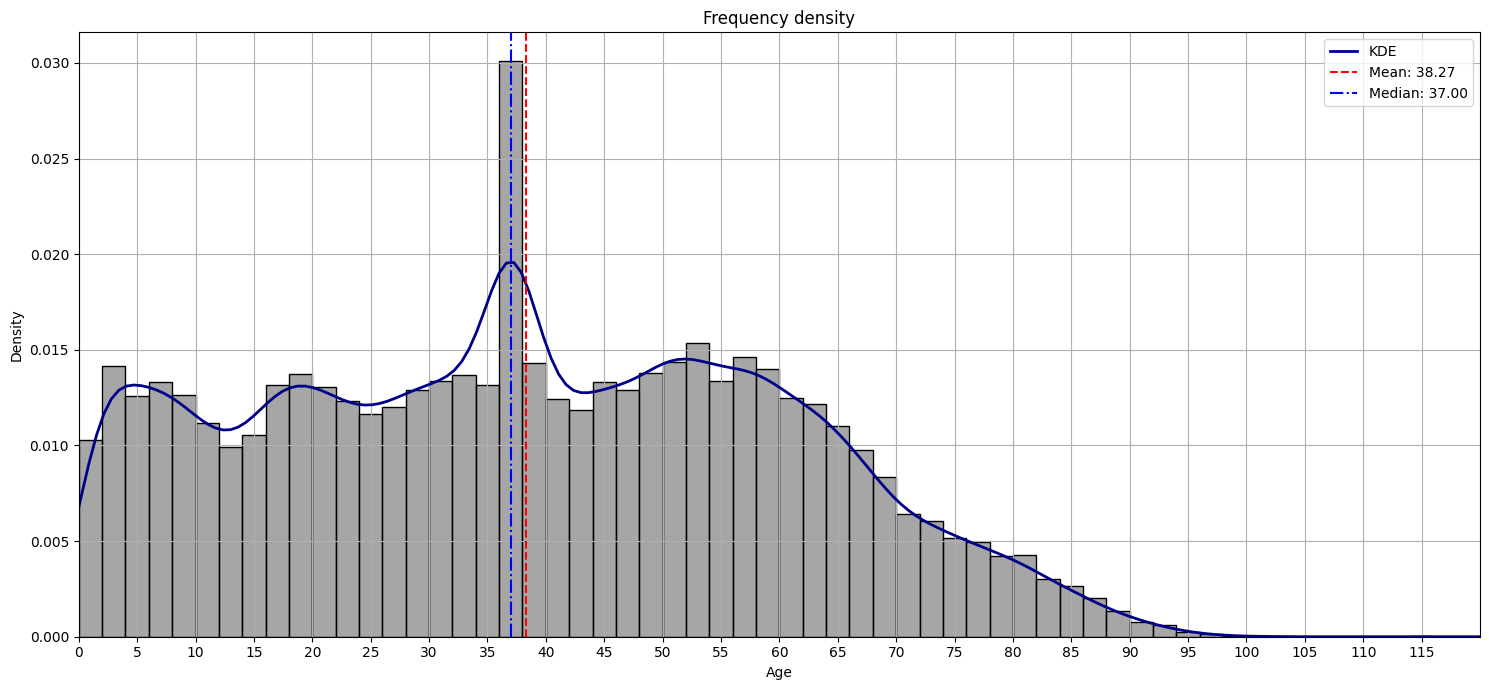

In [11]:
plot_frequency_density(df_patients['age'], bins=np.arange(0, 120, 2), color='grey', title='Frequency density', xlabel='Age',
                       ylabel='Density', xticks_range=(0, 120, 5), show_kde=True)